<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor


drive.mount('/content/drive')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
gws = sqlite3.connect('/content/drive/My Drive/FPL1.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
gws

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value
0,Aaron Cresswell,0,1,0,0,0,0,0,0,0,0,14023,55
1,Aaron Lennon,1,1,0.9,0,6,0,0,8.2,15,0,13918,60
2,Aaron Ramsey,2,1,3,0,5,0,0,2.2,60,23,163170,80
3,Abdoulaye DoucourÈ,0,1,0,0,0,0,0,0,0,0,1051,50
4,Abdul Rahman Baba,0,1,0,0,0,0,0,0,0,0,1243,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67931,Yves Bissouma,2,114,2.4,0,7,0,0,20.4,90,0,1736,46
67932,Zech Medley,0,114,0,0,0,0,0,0,0,0,5341,40
67933,Zeze Steven Sessegnon,0,114,0,0,0,0,0,0,0,0,5780,40
67934,¡lvaro Morata,0,114,0,0,0,0,0,0,0,0,83088,84


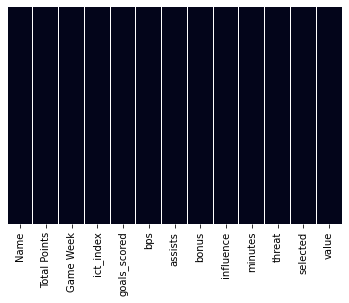

In [3]:
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False)

In [4]:
gws=gws.astype({'Total Points':int,'Game Week':int,'ict_index':float,'goals_scored':int,'bps':float,'assists':int,'bonus':int,'influence':float,'minutes':int,'threat':float,'selected':int,'value':int})

In [5]:
gws = gws.assign(id=(gws['Name']).astype('category').cat.codes)


In [6]:
gws.head(50)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,0
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,1
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,10
5,Abel Hern·ndez,5,1,5.7,0,10.0,1,0,14.4,90,30.0,26039,60,11
6,Adama Diomande,8,1,10.7,1,29.0,0,2,45.2,90,45.0,38151,45,24
7,Adam Clayton,2,1,1.4,0,6.0,0,0,3.2,90,9.0,17663,45,14
8,Adam Federici,0,1,0.0,0,0.0,0,0,0.0,0,0.0,4315,45,15
9,Adam Forshaw,1,1,0.3,0,3.0,0,0,2.0,69,0.0,2723,45,16


In [7]:
gws1=gws.copy()

In [8]:
gws.columns


Index(['Name', 'Total Points', 'Game Week', 'ict_index', 'goals_scored', 'bps',
       'assists', 'bonus', 'influence', 'minutes', 'threat', 'selected',
       'value', 'id'],
      dtype='object')

In [9]:
#gws1['Total Points'].plot(kind='bar')

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#x = gws1[['Total Points']].values.astype(float)
#scale = MinMaxScaler(feature_range=(0, 1) )

#scalerX = MinMaxScaler()
#scalery = MinMaxScaler()


#x_scaled = scale.fit(x)
#x_scaled=scale.transform(x)
#y = pd.DataFrame(x_scaled)


In [11]:
#gws1['Points']=y
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,0
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,1
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,4
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,9
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,10


In [12]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift()
gws1['Last_1_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(1)
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(2)
gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(3)
# gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(4)
# gws1['Last_5_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(5)
# gws1['Last_6_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(6)
# gws1['Last_7_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)
# gws1['Last_8_Week_Points'] = gws1.groupby(['id'])['Total Points'].shift(7)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift()
gws1['Last_1_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(1)
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2)
gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3)
# gws1['Last_4_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(4)
# gws1['Last_5_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(5)
# gws1['Last_6_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(6)
# gws1['Last_7_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)
# gws1['Last_8_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(7)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift()
gws1['Last_1_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(1)
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2)
gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3)
# gws1['Last_4_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(4)
# gws1['Last_5_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(5)
# gws1['Last_6_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(6)
# gws1['Last_7_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)
# gws1['Last_8_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(7)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift()
gws1['Last_1_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(1)
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2)
gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3)
# gws1['Last_4_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(4)
# gws1['Last_5_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(5)
# gws1['Last_6_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(6)
# gws1['Last_7_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)
# gws1['Last_8_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(7)



gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift()
gws1['Last_1_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(1)
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2)
gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3)
# gws1['Last_4_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(4)
# gws1['Last_5_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(5)
# gws1['Last_6_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(6)
# gws1['Last_7_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)
# gws1['Last_8_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(7)



gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift()
gws1['Last_1_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(1)
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2)
gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3)
# gws1['Last_4_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(4)
# gws1['Last_5_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(5)
# gws1['Last_6_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(6)
# gws1['Last_7_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)
# gws1['Last_8_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(7)



gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift()
gws1['Last_1_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(1)
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2)
gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3)
# gws1['Last_4_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(4)
# gws1['Last_5_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(5)
# gws1['Last_6_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(6)
# gws1['Last_7_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)
# gws1['Last_8_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(7)



gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift()
gws1['Last_1_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(1)
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2)
gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3)
# gws1['Last_4_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(4)
# gws1['Last_5_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(5)
# gws1['Last_6_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(6)
# gws1['Last_7_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)
# gws1['Last_8_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(7)



gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift()
gws1['Last_1_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(1)
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2)
gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3)
# gws1['Last_4_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(4)
# gws1['Last_5_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(5)
# gws1['Last_6_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(6)
# gws1['Last_7_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)
# gws1['Last_8_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(7)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift()
gws1['Last_1_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(1)
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2)
gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3)
# gws1['Last_4_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(4)
# gws1['Last_5_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(5)
# gws1['Last_6_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(6)
# gws1['Last_7_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)
# gws1['Last_8_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)


gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift()
gws1['Last_1_Week_Value'] = gws1.groupby(['id'])['value'].shift(1)
gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2)
gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3)
# gws1['Last_4_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(4)
# gws1['Last_5_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(5)
# gws1['Last_6_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(6)
# gws1['Last_7_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)
# gws1['Last_8_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(7)



gws1.head(600)

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_Week_Assists,Last_1_Week_Assists,Last_2_Week_Assists,Last_3_Week_Assists,Last_Week_Bonus,Last_1_Week_Bonus,Last_2_Week_Bonus,Last_3_Week_Bonus,Last_Week_Influence,Last_1_Week_Influence,Last_2_Week_Influence,Last_3_Week_Influence,Last_Week_Minutes_Played,Last_1_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_3_Week_Minutes_Played,Last_Week_Threat,Last_1_Week_Threat,Last_2_Week_Threat,Last_3_Week_Threat,Last_Week_Selected,Last_1_Week_Selected,Last_2_Week_Selected,Last_3_Week_Selected,Last_Week_Value,Last_1_Week_Value,Last_2_Week_Value,Last_3_Week_Value
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Ben Gibson,6,2,2.0,0,20.0,0,0,19.4,90,0.0,167647,46,124,2.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,1.7,1.7,NaN,NaN,6.0,6.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,10.4,10.4,NaN,NaN,90.0,90.0,NaN,NaN,6.0,6.0,NaN,NaN,17473.0,17473.0,NaN,NaN,45.0,45.0,NaN,NaN
596,Ben Hamer,0,2,0.0,0,0.0,0,0,0.0,0,0.0,359,45,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,Ben Hinchcliffe,0,2,0.0,0,0.0,0,0,0.0,0,0.0,1349,45,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,Ben Mee,6,2,4.1,0,27.0,0,0,38.8,90,2.0,32716,45,128,2.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,2.3,2.3,NaN,NaN,15.0,15.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,18.8,18.8,NaN,NaN,90.0,90.0,NaN,NaN,4.0,4.0,NaN,NaN,21801.0,21801.0,NaN,NaN,45.0,45.0,NaN,NaN


In [13]:
gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff()
gws1['Last_1_Week_Diff_Points'] = gws1.groupby(['id'])['Last_1_Week_Points'].diff()
gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff()
gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff()
# gws1['Last_4_Week_Diff_Points'] = gws1.groupby(['id'])['Last_4_Week_Points'].diff()
# gws1['Last_5_Week_Diff_Points'] = gws1.groupby(['id'])['Last_5_Week_Points'].diff()
# gws1['Last_6_Week_Diff_Points'] = gws1.groupby(['id'])['Last_6_Week_Points'].diff()
# gws1['Last_7_Week_Diff_Points'] = gws1.groupby(['id'])['Last_7_Week_Points'].diff()
# #gws1['Last_8_Week_Diff_Points'] = gws1.groupby(['id'])['Last_8_Week_Points'].diff()




gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff()
gws1['Last_1_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_1_Week_Goals'].diff()
gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff()
gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff()
# gws1['Last_4_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_4_Week_Goals'].diff()
# gws1['Last_5_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_5_Week_Goals'].diff()
# gws1['Last_6_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_6_Week_Goals'].diff()
# gws1['Last_7_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_7_Week_Goals'].diff()
# #gws1['Last_8_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_8_Week_Goals'].diff()


gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff()
gws1['Last_1_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_1_Week_BPS'].diff()
gws1['Last_2_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff()
gws1['Last_3_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff()
# gws1['Last_4_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_4_Week_BPS'].diff()
# gws1['Last_5_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_5_Week_BPS'].diff()
# gws1['Last_6_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_6_Week_BPS'].diff()
# gws1['Last_7_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_7_Week_BPS'].diff()
# #gws1['Last_8_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_8_Week_BPS'].diff()


gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff()
gws1['Last_1_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_1_Week_ICT'].diff()
gws1['Last_2_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff()
gws1['Last_3_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff()
#gws1['Last_Week_4_Diff_ICT'] = gws1.groupby(['id'])['Last_4_Week_ICT'].diff()
# gws1['Last_Week_5_Diff_ICT'] = gws1.groupby(['id'])['Last_5_Week_ICT'].diff()
# gws1['Last_Week_6_Diff_ICT'] = gws1.groupby(['id'])['Last_6_Week_ICT'].diff()
# gws1['Last_Week_7_Diff_ICT'] = gws1.groupby(['id'])['Last_7_Week_ICT'].diff()
# #gws1['Last_Week_8_Diff_BPS'] = gws1.groupby(['id'])['Last_8_Week_BPS'].diff()



gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff()
gws1['Last_1_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_1_Week_Assists'].diff()
gws1['Last_2_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff()
gws1['Last_3_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff()
# gws1['Last_Week_4_Diff_Assists'] = gws1.groupby(['id'])['Last_4_Week_Assists'].diff()
# gws1['Last_Week_5_Diff_Assists'] = gws1.groupby(['id'])['Last_5_Week_Assists'].diff()
# gws1['Last_Week_6_Diff_Assists'] = gws1.groupby(['id'])['Last_6_Week_Assists'].diff()
# gws1['Last_Week_7_Diff_Assists'] = gws1.groupby(['id'])['Last_7_Week_Assists'].diff()
# #gws1['Last_Week_8_Diff_Assists'] = gws1.groupby(['id'])['Last_8_Week_Assists'].diff()



gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff()
gws1['Last_1_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_1_Week_Bonus'].diff()
gws1['Last_2_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff()
gws1['Last_3_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff()
# gws1['Last_Week_4_Diff_Bonus'] = gws1.groupby(['id'])['Last_4_Week_Bonus'].diff()
# gws1['Last_Week_5_Diff_Bonus'] = gws1.groupby(['id'])['Last_5_Week_Bonus'].diff()
# gws1['Last_Week_6_Diff_Bonus'] = gws1.groupby(['id'])['Last_6_Week_Bonus'].diff()
# gws1['Last_Week_7_Diff_Bonus'] = gws1.groupby(['id'])['Last_7_Week_Bonus'].diff()
# #gws1['Last_Week_8_Diff_Bonus'] = gws1.groupby(['id'])['Last_8_Week_Bonus'].diff()


gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff()
gws1['Last_1_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_1_Week_Influence'].diff()
gws1['Last_2_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff()
gws1['Last_3_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff()
# gws1['Last_Week_4_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_4_Week_Minutes_Played'].diff()
# gws1['Last_Week_5_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_5_Week_Minutes_Played'].diff()
# gws1['Last_Week_6_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_6_Week_Minutes_Played'].diff()
# gws1['Last_Week_7_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_7_Week_Minutes_Played'].diff()
# #gws1['Last_Week_8_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_8_Week_Minutes_Played'].diff()



gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff()
gws1['Last_1_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_1_Week_Threat'].diff()
gws1['Last_2_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff()
gws1['Last_3_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff()
# gws1['Last_Week_4_Diff_Threat'] = gws1.groupby(['id'])['Last_4_Week_Threat'].diff()
# gws1['Last_Week_5_Diff_Threat'] = gws1.groupby(['id'])['Last_5_Week_Threat'].diff()
# gws1['Last_Week_6_Diff_Threat'] = gws1.groupby(['id'])['Last_6_Week_Threat'].diff()
# gws1['Last_Week_7_Diff_Threat'] = gws1.groupby(['id'])['Last_7_Week_Threat'].diff()
# #gws1['Last_Week_8_Diff_Threat'] = gws1.groupby(['id'])['Last_8_Week_Threat'].diff()


gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff()
gws1['Last_1_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_1_Week_Selected'].diff()
gws1['Last_2_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff()
gws1['Last_3_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff()
# gws1['Last_Week_4_Diff_Selected'] = gws1.groupby(['id'])['Last_4_Week_Selected'].diff()
# gws1['Last_Week_5_Diff_Selected'] = gws1.groupby(['id'])['Last_5_Week_Selected'].diff()
# gws1['Last_Week_6_Diff_Selected'] = gws1.groupby(['id'])['Last_6_Week_Selected'].diff()
# gws1['Last_Week_7_Diff_Selected'] = gws1.groupby(['id'])['Last_7_Week_Selected'].diff()
# #gws1['Last_Week_8_Diff_Selected'] = gws1.groupby(['id'])['Last_8_Week_Selected'].diff()

gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff()
gws1['Last_1_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_1_Week_Minutes_Played'].diff()
gws1['Last_2_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff()
gws1['Last_3_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff()
# gws1['Last_Week_4_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_4_Week_Minutes_Played'].diff()
# gws1['Last_Week_5_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_5_Week_Minutes_Played'].diff()
# gws1['Last_Week_6_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_6_Week_Minutes_Played'].diff()
# gws1['Last_Week_7_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_7_Week_Minutes_Played'].diff()
# #gws1['Last_Week_8_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_8_Week_Minutes_Played'].diff()

gws1['Last_Week_Diff_Value'] = gws1.groupby(['id'])['Last_Week_Value'].diff()
gws1['Last_1_Week_Diff_Value'] = gws1.groupby(['id'])['Last_1_Week_Value'].diff()
gws1['Last_2_Week_Diff_Value'] = gws1.groupby(['id'])['Last_2_Week_Value'].diff()
gws1['Last_3_Week_Diff_Value'] = gws1.groupby(['id'])['Last_3_Week_Value'].diff()
# gws1['Last_Week_4_Diff_Selected'] = gws1.groupby(['id'])['Last_4_Week_Selected'].diff()
# gws1['Last_Week_5_Diff_Selected'] = gws1.groupby(['id'])['Last_5_Week_Selected'].diff()
# gws1['Last_Week_6_Diff_Selected'] = gws1.groupby(['id'])['Last_6_Week_Selected'].diff()
# gws1['Last_Week_7_Diff_Selected'] = gws1.groupby(['id'])['Last_7_Week_Selected'].diff()
# #gws1['Last_Week_8_Diff_Selected'] = gws1.groupby(['id'])['Last_8_Week_Selected'].diff()

In [14]:
#gws1['rolling_mean'] = gws1['Total Points'].rolling(window=7).mean()
gws1['Rolling Mean Points'] = gws1['Total Points'].rolling(window=2).mean()
gws1['Rolling Mean Points 1']=gws1['Last_Week_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points 2']=gws1['Last_1_Week_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points 3']=gws1['Last_2_Week_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points diff 1'] = gws1['Last_Week_Diff_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points diff 2'] = gws1['Last_1_Week_Diff_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points diff 3'] = gws1['Last_2_Week_Diff_Points'].rolling(window=2).mean()
gws1['Rolling Mean Points diff 4'] = gws1['Last_3_Week_Diff_Points'].rolling(window=2).mean()


gws1['Rolling Mean Goals'] = gws1['goals_scored'].rolling(window=2).mean()
gws1['Rolling Mean Goals 1'] = gws1['Last_Week_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals 2'] = gws1['Last_1_Week_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals 3'] = gws1['Last_2_Week_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals diff 1'] = gws1['Last_Week_Diff_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals diff 2'] = gws1['Last_1_Week_Diff_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals diff 3'] = gws1['Last_2_Week_Diff_Goals'].rolling(window=2).mean()
gws1['Rolling Mean Goals diff 4'] = gws1['Last_3_Week_Goals'].rolling(window=2).mean()





gws1['Rolling Mean ICT'] = gws1['ict_index'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index 1'] = gws1['Last_Week_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index 2'] = gws1['Last_1_Week_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index 3'] = gws1['Last_2_Week_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index Diff 1'] = gws1['Last_Week_Diff_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index Diff 2'] = gws1['Last_1_Week_Diff_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index diff 3'] = gws1['Last_2_Week_Diff_ICT'].rolling(window=2).mean()
gws1['Rolling Mean ICT Index diff 4'] = gws1['Last_3_Week_Diff_ICT'].rolling(window=2).mean()


gws1['Rolling Mean Influence'] = gws1['influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence 1'] = gws1['Last_Week_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence 2'] = gws1['Last_1_Week_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence 3'] = gws1['Last_2_Week_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence Diff 1'] = gws1['Last_Week_Diff_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence Diff 2'] = gws1['Last_1_Week_Diff_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence diff 3'] = gws1['Last_2_Week_Diff_Influence'].rolling(window=2).mean()
gws1['Rolling Mean Influence diff 4'] = gws1['Last_3_Week_Diff_Influence'].rolling(window=2).mean()


gws1['Rolling Mean Threat'] = gws1['threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat 1'] = gws1['Last_Week_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat 2'] = gws1['Last_1_Week_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat 3'] = gws1['Last_2_Week_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat Diff 1'] = gws1['Last_Week_Diff_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat Diff 2'] = gws1['Last_1_Week_Diff_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat diff 3'] = gws1['Last_2_Week_Diff_Threat'].rolling(window=2).mean()
gws1['Rolling Mean Threat diff 4'] = gws1['Last_3_Week_Diff_Threat'].rolling(window=2).mean()


gws1['Rolling Mean BPS'] = gws1['bps'].rolling(window=2).mean()
gws1['Rolling Mean BPS 1'] = gws1['Last_Week_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS 2'] = gws1['Last_1_Week_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS 3'] = gws1['Last_2_Week_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS Diff 1'] = gws1['Last_Week_Diff_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS Diff 2'] = gws1['Last_1_Week_Diff_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS diff 3'] = gws1['Last_2_Week_Diff_BPS'].rolling(window=2).mean()
gws1['Rolling Mean BPS diff 4'] = gws1['Last_3_Week_Diff_BPS'].rolling(window=2).mean()


gws1['Rolling Mean Bonus'] = gws1['bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus 1'] = gws1['Last_Week_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus 2'] = gws1['Last_1_Week_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus 3'] = gws1['Last_2_Week_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus Diff 1'] = gws1['Last_Week_Diff_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus Diff 2'] = gws1['Last_1_Week_Diff_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus diff 3'] = gws1['Last_2_Week_Diff_Bonus'].rolling(window=2).mean()
gws1['Rolling Mean Bonus diff 4'] = gws1['Last_3_Week_Diff_Bonus'].rolling(window=2).mean()


gws1['Rolling Mean Assists'] = gws1['assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists 1'] = gws1['Last_Week_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists 2'] = gws1['Last_1_Week_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists 3'] = gws1['Last_2_Week_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists Diff 1'] = gws1['Last_Week_Diff_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists Diff 2'] = gws1['Last_1_Week_Diff_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists diff 3'] = gws1['Last_2_Week_Diff_Assists'].rolling(window=2).mean()
gws1['Rolling Mean Assists diff 4'] = gws1['Last_3_Week_Diff_Assists'].rolling(window=2).mean()


gws1['Rolling Mean Minutes_Played'] = gws1['minutes'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played 1'] = gws1['Last_Week_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played 2'] = gws1['Last_1_Week_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played 3'] = gws1['Last_2_Week_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played Diff 1'] = gws1['Last_Week_Diff_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played Diff 2'] = gws1['Last_1_Week_Diff_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played diff 3'] = gws1['Last_2_Week_Diff_Minutes_Played'].rolling(window=2).mean()
gws1['Rolling Mean Minutes_Played diff 4'] = gws1['Last_3_Week_Diff_Minutes_Played'].rolling(window=2).mean()



gws1['Rolling Mean Selected'] = gws1['selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected 1'] = gws1['Last_Week_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected 2'] = gws1['Last_1_Week_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected 3'] = gws1['Last_2_Week_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected Diff 1'] = gws1['Last_Week_Diff_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected Diff2'] = gws1['Last_1_Week_Diff_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected diff 3'] = gws1['Last_2_Week_Diff_Selected'].rolling(window=2).mean()
gws1['Rolling Mean Selected diff 4'] = gws1['Last_3_Week_Diff_Selected'].rolling(window=2).mean()

gws1['Rolling Mean Value'] = gws1['value'].rolling(window=2).mean()
gws1['Rolling Mean Value 1'] = gws1['Last_Week_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value 2'] = gws1['Last_1_Week_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value 3'] = gws1['Last_2_Week_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value Diff 1'] = gws1['Last_Week_Diff_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value Diff2'] = gws1['Last_1_Week_Diff_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value diff 3'] = gws1['Last_2_Week_Diff_Value'].rolling(window=2).mean()
gws1['Rolling Mean Value diff 4'] = gws1['Last_3_Week_Diff_Value'].rolling(window=2).mean()

#gws1.drop(['ROlling Mean Point Diff'],axis=1,inplace=True)

gws1.head()

,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_Week_Assists,Last_1_Week_Assists,Last_2_Week_Assists,Last_3_Week_Assists,Last_Week_Bonus,Last_1_Week_Bonus,Last_2_Week_Bonus,Last_3_Week_Bonus,Last_Week_Influence,Last_1_Week_Influence,...,Rolling Mean Bonus,Rolling Mean Bonus 1,Rolling Mean Bonus 2,Rolling Mean Bonus 3,Rolling Mean Bonus Diff 1,Rolling Mean Bonus Diff 2,Rolling Mean Bonus diff 3,Rolling Mean Bonus diff 4,Rolling Mean Assists,Rolling Mean Assists 1,Rolling Mean Assists 2,Rolling Mean Assists 3,Rolling Mean Assists Diff 1,Rolling Mean Assists Diff 2,Rolling Mean Assists diff 3,Rolling Mean Assists diff 4,Rolling Mean Minutes_Played,Rolling Mean Minutes_Played 1,Rolling Mean Minutes_Played 2,Rolling Mean Minutes_Played 3,Rolling Mean Minutes_Played Diff 1,Rolling Mean Minutes_Played Diff 2,Rolling Mean Minutes_Played diff 3,Rolling Mean Minutes_Played diff 4,Rolling Mean Selected,Rolling Mean Selected 1,Rolling Mean Selected 2,Rolling Mean Selected 3,Rolling Mean Selected Diff 1,Rolling Mean Selected Diff2,Rolling Mean Selected diff 3,Rolling Mean Selected diff 4,Rolling Mean Value,Rolling Mean Value 1,Rolling Mean Value 2,Rolling Mean Value 3,Rolling Mean Value Diff 1,Rolling Mean Value Diff2,Rolling Mean Value diff 3,Rolling Mean Value diff 4
0,Aaron Cresswell,0,1,0.0,0,0.0,0,0,0.0,0,0.0,14023,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Lennon,1,1,0.9,0,6.0,0,0,8.2,15,0.0,13918,60,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13970.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsey,2,1,3.0,0,5.0,0,0,2.2,60,23.0,163170,80,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye DoucourÈ,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1051,50,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82110.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman Baba,0,1,0.0,0,0.0,0,0,0.0,0,0.0,1243,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
gws1=gws1.dropna()
#gws1.drop('Total Points',axis=1, inplace=True)


In [16]:
gws1.head()


,Name,Total Points,Game Week,ict_index,goals_scored,bps,assists,bonus,influence,minutes,threat,selected,value,id,Last_Week_Points,Last_1_Week_Points,Last_2_Week_Points,Last_3_Week_Points,Last_Week_Goals,Last_1_Week_Goals,Last_2_Week_Goals,Last_3_Week_Goals,Last_Week_ICT,Last_1_Week_ICT,Last_2_Week_ICT,Last_3_Week_ICT,Last_Week_BPS,Last_1_Week_BPS,Last_2_Week_BPS,Last_3_Week_BPS,Last_Week_Assists,Last_1_Week_Assists,Last_2_Week_Assists,Last_3_Week_Assists,Last_Week_Bonus,Last_1_Week_Bonus,Last_2_Week_Bonus,Last_3_Week_Bonus,Last_Week_Influence,Last_1_Week_Influence,...,Rolling Mean Bonus,Rolling Mean Bonus 1,Rolling Mean Bonus 2,Rolling Mean Bonus 3,Rolling Mean Bonus Diff 1,Rolling Mean Bonus Diff 2,Rolling Mean Bonus diff 3,Rolling Mean Bonus diff 4,Rolling Mean Assists,Rolling Mean Assists 1,Rolling Mean Assists 2,Rolling Mean Assists 3,Rolling Mean Assists Diff 1,Rolling Mean Assists Diff 2,Rolling Mean Assists diff 3,Rolling Mean Assists diff 4,Rolling Mean Minutes_Played,Rolling Mean Minutes_Played 1,Rolling Mean Minutes_Played 2,Rolling Mean Minutes_Played 3,Rolling Mean Minutes_Played Diff 1,Rolling Mean Minutes_Played Diff 2,Rolling Mean Minutes_Played diff 3,Rolling Mean Minutes_Played diff 4,Rolling Mean Selected,Rolling Mean Selected 1,Rolling Mean Selected 2,Rolling Mean Selected 3,Rolling Mean Selected Diff 1,Rolling Mean Selected Diff2,Rolling Mean Selected diff 3,Rolling Mean Selected diff 4,Rolling Mean Value,Rolling Mean Value 1,Rolling Mean Value 2,Rolling Mean Value 3,Rolling Mean Value Diff 1,Rolling Mean Value Diff2,Rolling Mean Value diff 3,Rolling Mean Value diff 4
2323,Aaron Lennon,2,5,2.4,0,13.0,0,0,8.4,64,2.0,7492,56,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.6,0.6,0.7,0.4,6.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,77.5,77.5,60.5,17.0,17.0,13.5,39.5,11792.5,11844.0,11844.0,11277.5,566.5,566.5,1129.0,-3822.0,54.5,54.5,54.5,54.5,0.0,0.0,0.0,-3.0
2324,Aaron Ramsey,1,5,5.1,0,7.0,0,0,3.0,16,26.0,42872,76,4,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.1,1.1,0.5,4.8,-1.0,-1.0,2.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,40.0,77.5,77.5,28.5,49.0,49.0,19.5,-28.5,25182.0,24755.5,24755.5,24782.5,-27.0,-27.0,1090.0,-64851.5,66.0,66.0,66.0,66.0,0.0,0.0,0.0,-4.0
2325,Abdoulaye DoucourÈ,0,5,0.0,0,0.0,0,0,0.0,0,0.0,660,46,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,8.0,45.0,45.0,13.0,32.0,32.0,6.0,-23.0,21766.0,21337.0,21337.0,21339.5,-2.5,-2.5,1134.0,-61905.0,61.0,61.0,61.0,61.5,-0.5,-0.5,0.0,-3.5
2326,Abdul Rahman Baba,0,5,0.0,0,0.0,0,0,0.0,0,0.0,993,55,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,826.5,813.0,813.0,785.0,28.0,28.0,2.5,-364.5,50.5,50.5,50.5,51.0,-0.5,-0.5,0.0,-1.5
2327,Abel Hern·ndez,0,5,0.0,0,0.0,0,0,0.0,0,0.0,43910,60,11,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,5.5,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,4.0,-4.0,-4.0,-41.0,0.0,22451.5,24691.5,24691.5,30279.0,-5587.5,-5587.5,-1990.5,18628.5,57.5,57.5,57.5,57.5,0.0,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
X=gws1.drop(['Name','Total Points','ict_index','goals_scored','bps','assists','bonus','influence','minutes','threat'],axis=1)
#X=gws1.drop(['Name','Total Points','influence','bps','bonus','ict_index'],axis=1)
y=gws1['Total Points']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Ridge()
#model.fit(X_train, y_train)
#model=Ridge()
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
  print('Train: %s | test: %s' % (train_indices, test_indices))
 
[model.fit(X_train, y_train).score(X_test, y_test)
for train, test in k_fold.split(X)]

Train: [12390 12391 12392 ... 61943 61944 61945] | test: [    0     1     2 ... 12387 12388 12389]
Train: [    0     1     2 ... 61943 61944 61945] | test: [12390 12391 12392 ... 24776 24777 24778]
Train: [    0     1     2 ... 61943 61944 61945] | test: [24779 24780 24781 ... 37165 37166 37167]
Train: [    0     1     2 ... 61943 61944 61945] | test: [37168 37169 37170 ... 49554 49555 49556]
Train: [    0     1     2 ... 49554 49555 49556] | test: [49557 49558 49559 ... 61943 61944 61945]


[0.7830098567802631,
 0.7836929329733424,
 0.7828912085161875,
 0.7830097581072295,
 0.7847785111850185]

ValueError: ignored

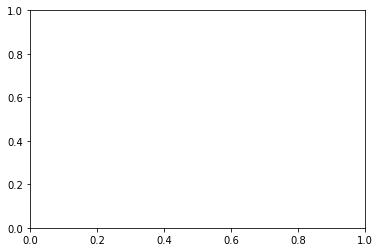

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(gws1.drop('Name',axis=1), lags=50)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],"n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)


In [ ]:
predict = random_search.predict(X_test)
print(explained_variance_score(y_test, predict))

In [ ]:
 score=cross_val_score(model, X, y, cv=k_fold,scoring='r2')
score.mean()

In [1]:
predict=model.predict(X_test)

NameError: ignored

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':predict})
df.head(50)

In [ ]:
_, ax = plt.subplots(figsize=(20,25))
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predict.size), y=predict, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.legend()
plt.show()

In [ ]:
sns.scatterplot(y_test,predict)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))


In [ ]:
sns.distplot(y_test-predict,color='purple',kde=True)

In [ ]:
#plt.figure(figsize=(50,15))
#gws1.groupby(['Name'])['Total Points'].plot().head(30)

In [ ]:
a['Last_Week_Points'] = a.groupby(['id'])['Total Points'].shift()
a['Last_1_Week_Points'] = a.groupby(['id'])['Total Points'].shift(1)
a['Last_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift()
a['Last_1_Week_Goals'] = a.groupby(['id'])['goals_scored'].shift(1)
a['Last_Week_ICT'] = a.groupby(['id'])['ict_index'].shift()
a['Last_1_Week_ICT'] = a.groupby(['id'])['ict_index'].shift(1)
a['Last_Week_BPS'] = a.groupby(['id'])['bps'].shift()
a['Last_1_Week_BPS'] = a.groupby(['id'])['bps'].shift(1)
a['Last_Week_Diff_Points'] = a.groupby(['id'])['Last_Week_Points'].diff()
a['Last_1_Week_Diff_Points'] = a.groupby(['id'])['Last_1_Week_Points'].diff()
a['Last_Week_Diff_Goals'] = a.groupby(['id'])['Last_Week_Goals'].diff()
a['Last_1_Week_Diff_Goals'] = a.groupby(['id'])['Last_1_Week_Goals'].diff()
a['Last_Week_Diff_ICT'] = a.groupby(['id'])['Last_Week_ICT'].diff()
a['Last_Week_1_Diff_ICT'] = a.groupby(['id'])['Last_1_Week_ICT'].diff()
a['Last_Week_Diff_BPS'] = a.groupby(['id'])['Last_Week_BPS'].diff()
a['Last_Week_1_Diff_BPS'] = a.groupby(['id'])['Last_1_Week_BPS'].diff()
#c=a.drop('Name',axis=1)
c=a
c.head()
#b=mdl.predict(c)

In [ ]:
c.replace(np.NaN,0, inplace=True)
c

In [ ]:
b=pd.DataFrame(mdl.predict(c.drop(['Name','Total Points'],axis=1)))